In [1]:
import pickle
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm 
import networkx as nx
import osmnx as ox
import seaborn as sns
import momepy
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable

/home/twenty/miniconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


# Delhi

## Roads

In [2]:
df = gpd.read_file('data/india/overpass/roads_clipped/roads_clipped2.shp')

In [3]:
# reproject to pseudo mercator where units are in meters
df.geometry = df.geometry.to_crs(3857)

In [4]:
# From london centrality

In [5]:
df.geometry.apply(lambda x: x.geom_type).unique()

array(['LineString', 'MultiLineString'], dtype=object)

In [6]:
exploded = df[df.geometry.geom_type == 'MultiLineString'].explode(index_parts=False)
exploded.head()

,id,@id,highway,lanes,name,network,ref,route,surface,type,...,buses,name_ckb,alt_name_e,noname,incline,narrow,@relations,railway,descriptio,geometry
142,way/25524661,way/25524661,primary,2,Faridabad-Gurgaon Road,None,MDR137,None,asphalt,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (8590135.497 3300958.387, 8590056.7..."
142,way/25524661,way/25524661,primary,2,Faridabad-Gurgaon Road,None,MDR137,None,asphalt,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (8589097.396 3301792.233, 8589095.0..."
142,way/25524661,way/25524661,primary,2,Faridabad-Gurgaon Road,None,MDR137,None,asphalt,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (8585976.135 3304418.353, 8585954.8..."
142,way/25524661,way/25524661,primary,2,Faridabad-Gurgaon Road,None,MDR137,None,asphalt,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (8585194.636 3304602.583, 8585195.0..."
1550,way/127184396,way/127184396,primary,2,Faridabad-Gurgaon Road,None,MDR137,None,asphalt,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (8583630.265 3308096.736, 8583667.7..."


In [7]:
df_fixed = pd.concat([df[df.geometry.geom_type != 'MultiLineString'], exploded])
df_fixed

,id,@id,highway,lanes,name,network,ref,route,surface,type,...,buses,name_ckb,alt_name_e,noname,incline,narrow,@relations,railway,descriptio,geometry
0,way/5873630,way/5873630,primary,None,Mahatma Gandhi Marg,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (8597384.211 3333723.207, 8597359.6..."
1,way/22834653,way/22834653,primary,None,Cariappa Marg,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (8588162.794 3324409.673, 8587874.1..."
2,way/22897615,way/22897615,trunk,None,None,None,NH48,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (8587907.727 3323009.471, 8587910.7..."
3,way/23089145,way/23089145,tertiary,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (8595742.515 3334265.176, 8595769.7..."
4,way/23089146,way/23089146,tertiary,None,Under Hill Road,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (8595866.314 3334871.117, 8596025.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,way/213107742,way/213107742,tertiary,None,None,None,None,None,asphalt,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (8579737.830 3360679.269, 8579798.9..."
2477,way/239364418,way/239364418,trunk,3,Bahadurgarh Bypass,None,NH9,None,asphalt,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (8564941.314 3333807.642, 8565285.6..."
2477,way/239364418,way/239364418,trunk,3,Bahadurgarh Bypass,None,NH9,None,asphalt,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (8565595.424 3335360.105, 8565600.4..."
2478,way/239364419,way/239364419,trunk,3,Bahadurgarh Bypass,None,NH9,None,asphalt,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (8565631.093 3335520.356, 8565626.8..."


In [8]:
#https://networkx.org/documentation/latest/auto_examples/geospatial/plot_lines.html#sphx-glr-auto-examples-geospatial-plot-lines-py
G = momepy.gdf_to_nx(df_fixed, approach="primal")

In [9]:
# node closeness centrality
#node_centrality = nx.closeness_centrality(G)

In [10]:
# df1 = pd.DataFrame(data=pd.Series(node_centrality), columns=['cc'])
# df1['colors'] = ox.plot.get_colors(n=len(df1), cmap='inferno', start=0.2)
# df1.reset_index(inplace=True)
# df1.rename(columns={'level_0': 'x', 'level_1': 'y'}, inplace=True)
# df1

In [11]:
# _, ax = plt.subplots(figsize=(10, 7))
# # this draws weird loops for some reason
# #nx.draw_networkx_edges(G, pos={(row.x, row.y): (row.x, row.y) for _, row in df1.iterrows()}, ax=ax)
# df.plot(ax=ax, color='grey', alpha=0.2)
# sns.scatterplot(x=df1.x, y=df1.y, hue=df1.cc, palette='inferno', ax=ax)
# plt.tight_layout()
# plt.axis('off')
# ax.legend(title='Closeness centrality')
# plt.savefig('cc.png')

The one from the practical doesn't work because it uses omnx. Found an alternative approach

https://docs.momepy.org/en/stable/user_guide/graph/centrality.html

In [12]:
primal = momepy.closeness_centrality(G, name='closeness_global', weight='mm_len')

In [13]:
momepy.mean_nodes(primal, 'closeness_global')

In [14]:
primal_gdf = momepy.nx_to_gdf(primal, points=False)

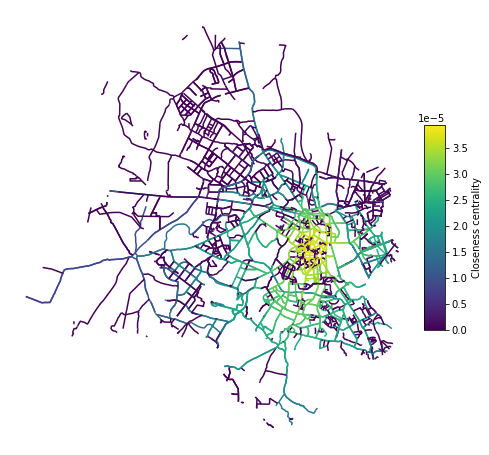

In [15]:
_, ax = plt.subplots(figsize=(10, 7))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cax.set_aspect(10)
primal_gdf.plot('closeness_global', ax=ax, legend=True, cax=cax, legend_kwds={'label': 'Closeness centrality'})
plt.tight_layout()
ax.axis('off')
plt.savefig('cc_edge.png')

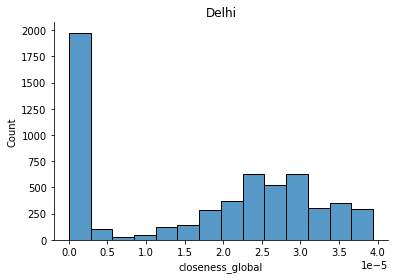

In [16]:
sns.histplot(x=primal_gdf.closeness_global)
sns.despine()
plt.title('Delhi')
plt.savefig('figures/d_cc_hist.png')

In [17]:
primal_gdf[['closeness_global', 'geometry']].to_csv('gen/delhi_c.csv')

In [18]:
primal_gdf.shape

(5802, 95)

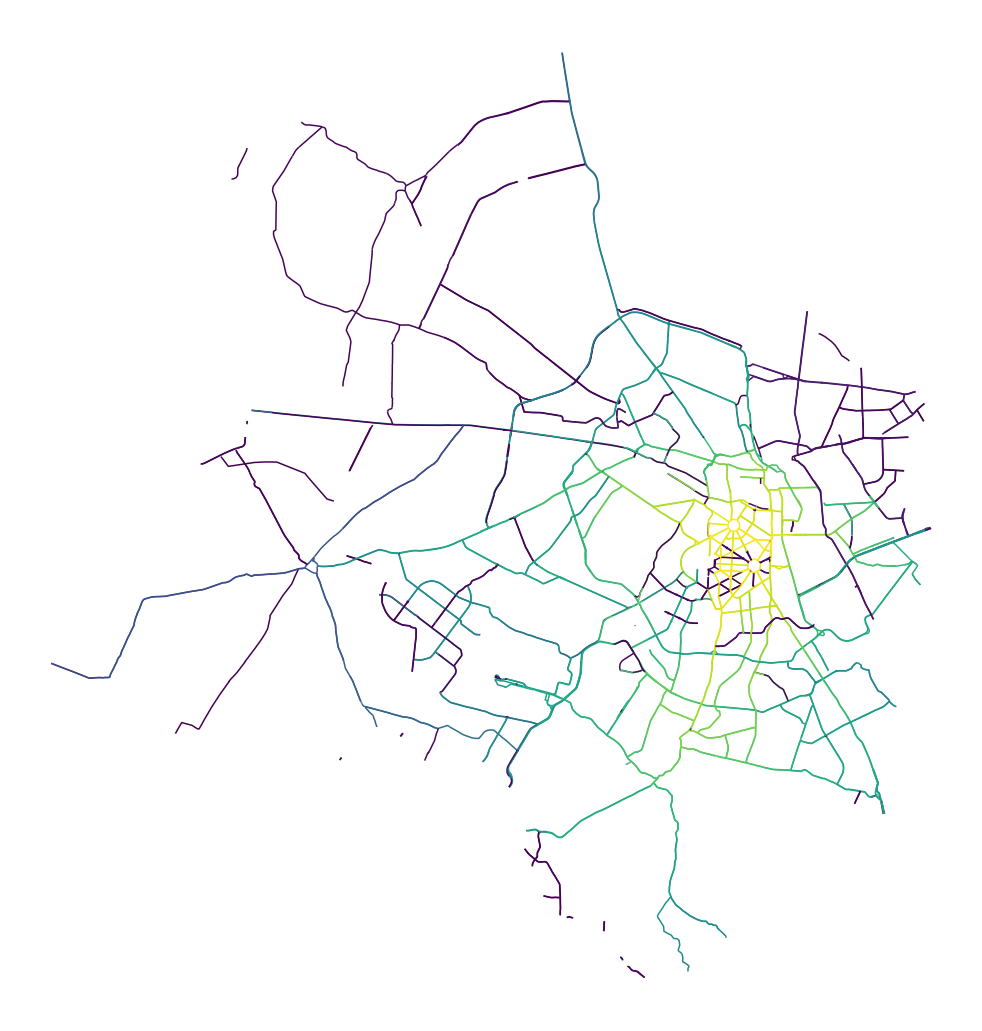

In [36]:
_, ax = plt.subplots(figsize=(15 , 15))
primal_gdf.plot('closeness_global', ax=ax)
plt.tight_layout()
plt.axis('off')
#plt.savefig('cc_edge.png')

In [37]:
primal_b = momepy.betweenness_centrality(G, name='betweenness_centrality', weight='mm_len')

In [38]:
momepy.mean_nodes(primal_b, 'betweenness_centrality')

In [39]:
primal_b_gdf = momepy.nx_to_gdf(primal_b, points=False)

(8550613.370718058, 8611153.78605608, 3297811.449325244, 3361443.8842223887)

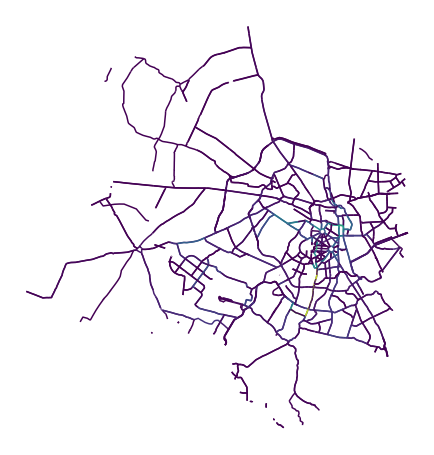

In [40]:
_, ax = plt.subplots(figsize=(10, 7))
primal_b_gdf.plot('betweenness_centrality', ax=ax)
plt.tight_layout()
plt.axis('off')
#plt.savefig('cc_edge.png')

<AxesSubplot:xlabel='betweenness_centrality', ylabel='Count'>

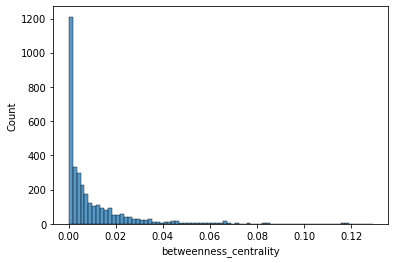

In [49]:
sns.histplot(x=primal_b_gdf.betweenness_centrality)

In [41]:
primal_s = momepy.straightness_centrality(G, name='straightness_centrality', weight='mm_len')

In [42]:
momepy.mean_nodes(primal_s, 'straightness_centrality')

In [43]:
primal_s_gdf = momepy.nx_to_gdf(primal_s, points=False)

No handles with labels found to put in legend.


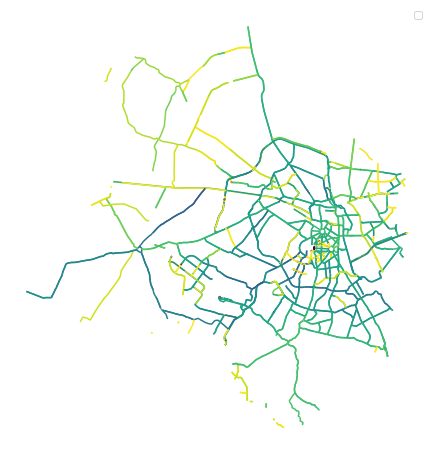

In [45]:
_, ax = plt.subplots(figsize=(10, 7))
primal_s_gdf.plot('straightness_centrality', ax=ax)
plt.tight_layout()
plt.axis('off')
#plt.savefig('cc_edge.png')

<AxesSubplot:xlabel='straightness_centrality', ylabel='Count'>

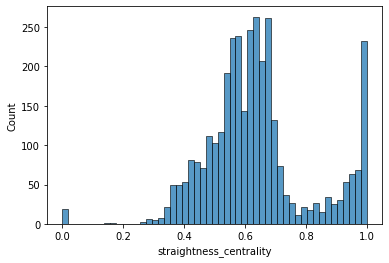

In [47]:
sns.histplot(x=primal_s_gdf.straightness_centrality)